<a href="https://colab.research.google.com/github/Fahmi-adzkar/Machine-Learning-untuk-fisika/blob/main/Basic_NeuralNetwok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# get the "numpy" library for linear algebra

# In the lecture videos, I do this:
#
# from numpy import *
#
# WARNING: It is generally considered bad
# programming style to "import *", as it
# can lead to confusion. For me, I
#  (1) ALWAYS import numpy
#  (2) NEVER import any other package in this * way
# Therefore, there is never confusion for me, and
# it makes my code a bit more readable (for me).
# However, since 99% of people are using the 
# syntax "import numpy as np" and then
# access "np.exp()" etc., you
# should probably also use "np" once you start
# exchanging code with others. I convert
# back to the np. syntax when I turn my
# converged code into a module.
#
# It is apparently officially accepted to explicitly
# list all the functions you need from numpy:

from numpy import array, zeros, exp, random, dot, shape, reshape, meshgrid, linspace

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

In [ ]:
N0=3 # input layer size
N1=2 # output layer size

# initialize random weights: array dimensions N1xN0
w=random.uniform(low=-1,high=+1,size=(N1,N0))
# initialize random biases: N1 vector
b=random.uniform(low=-1,high=+1,size=N1)

In [ ]:
# input values
y_in=array([0.2,0.4,-0.1])

In [ ]:
# evaluate network by hand, in two steps
z=dot(w,y_in)+b # result: the vector of 'z' values, length N1
y_out=1/(1+exp(-z)) # the 'sigmoid' function (applied elementwise)

In [ ]:
print("network input y_in:", y_in)
print("weights w:", w)
print("bias vector b:", b)
print("linear superposition z:", z)
print("network output y_out:", y_out)

network input y_in: [ 0.2  0.4 -0.1]
weights w: [[-0.53563285 -0.20686761  0.62273551]
 [-0.30351101  0.48342976  0.78193496]]
bias vector b: [-0.58542971 -0.86631042]
linear superposition z: [-0.83757687 -0.81183421]
network output y_out: [0.30204537 0.30749977]


In [ ]:
# a function that applies the network
def apply_net(y_in):
    global w, b
    
    z=dot(w,y_in)+b    
    return(1/(1+exp(-z)))

In [ ]:
N0=2 # input layer size
N1=1 # output layer size

w=random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights: N1xN0
b=random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

In [ ]:
apply_net([0.8,0.3]) # a simple test

array([0.01359482])

In [ ]:
# Note: this is NOT the most efficient way to do this! (but simple)
# We will later learn to use array syntax efficiently

M=50 # will create picture of size MxM
y_out=zeros([M,M]) # array MxM, to hold the result

for j1 in range(M):
    for j2 in range(M):
        # out of these integer indices, generate
        # two values in the range -0.5...0.5
        # and then apply the network to those two
        # input values
        value0=float(j1)/M-0.5
        value1=float(j2)/M-0.5
        y_out[j1,j2]=apply_net([value0,value1])[0]

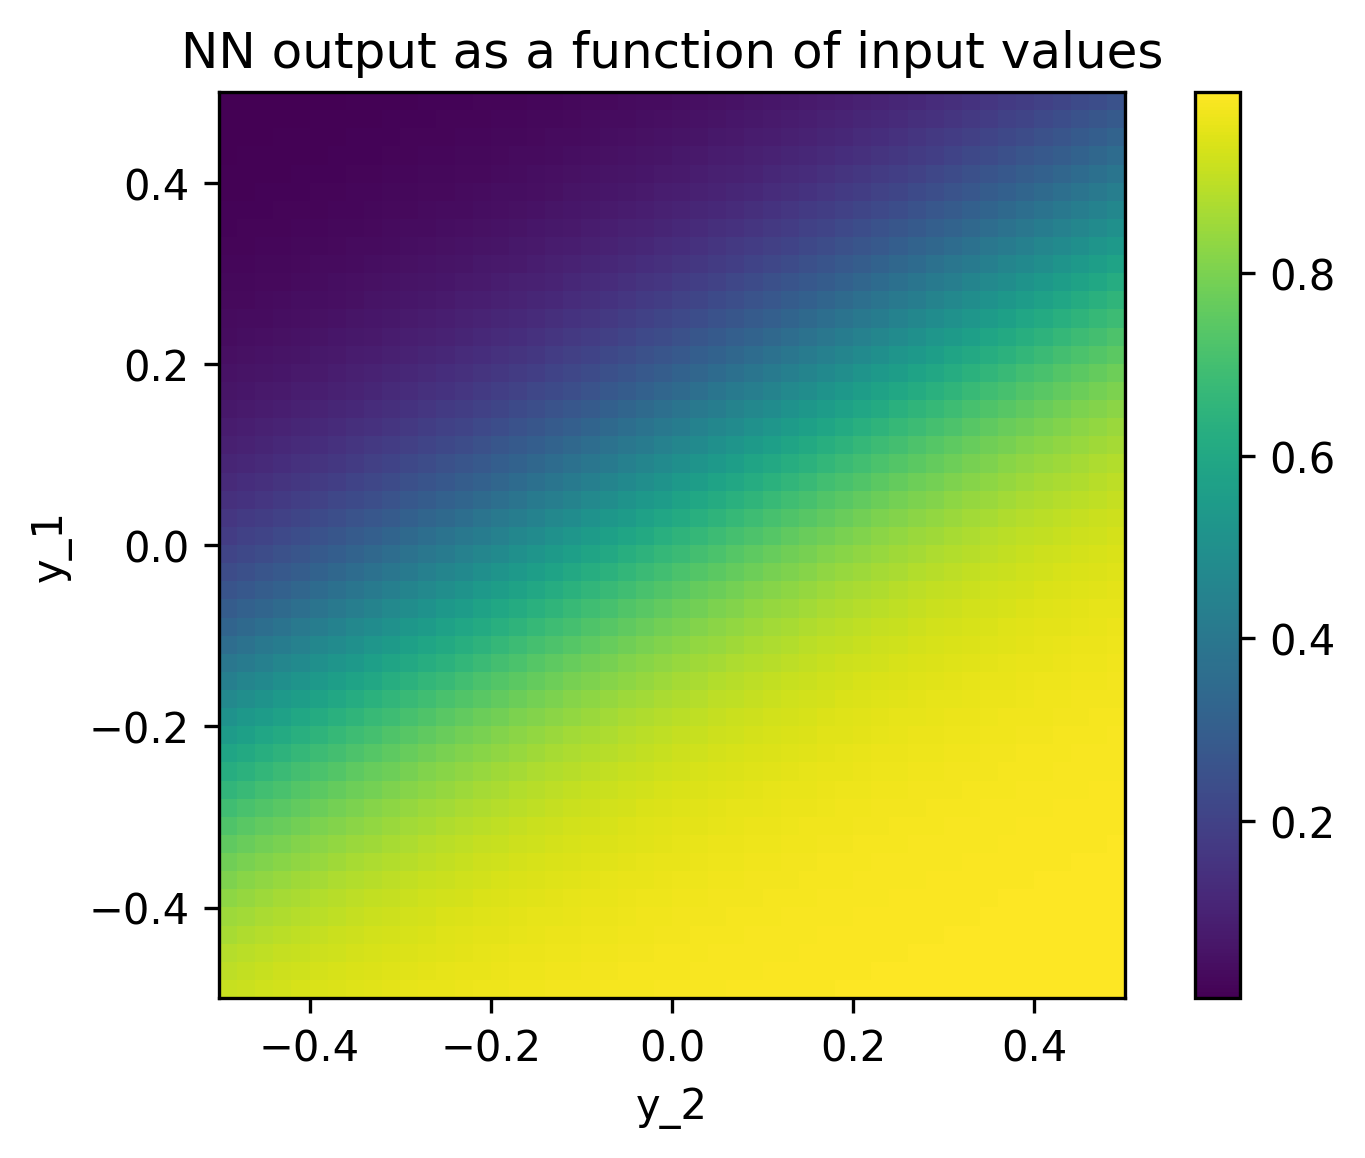

In [ ]:
# display image
plt.imshow(y_out,origin='lower',extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output as a function of input values")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

In [ ]:
# a function that evaluates one layer based
# on the neuron values in the preceding layer
def apply_layer(y_in,w,b): 
    z=dot(w,y_in)+b
    return(1/(1+exp(-z)))

In [ ]:
N0=2 # input layer size
N1=30 # hidden layer size
N2=1 # output layer size

# weights and biases
# from input layer to hidden layer:
w1=random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights: N1xN0
b1=random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

# weights+biases from hidden layer to output layer:
w2=random.uniform(low=-10,high=+10,size=(N2,N1)) # random weights
b2=random.uniform(low=-1,high=+1,size=N2) # biases

In [ ]:
# evaluate the network by subsequently
# evaluating the two steps (input to hidden and
# hidden to output)
def apply_net(y_in):
    global w1,b1,w2,b2
    
    y1=apply_layer(y_in,w1,b1)
    y2=apply_layer(y1,w2,b2)
    return(y2)

In [ ]:
# Again, obtain values for a range of inputs
# Note: this is NOT the most efficient way to do this! (but simple)

M=50 # will create picture of size MxM
y_out=zeros([M,M]) # array MxM, to hold the result

for j1 in range(M):
    for j2 in range(M):
        value0=float(j1)/M-0.5
        value1=float(j2)/M-0.5
        y_out[j1,j2]=apply_net([value0,value1])[0]

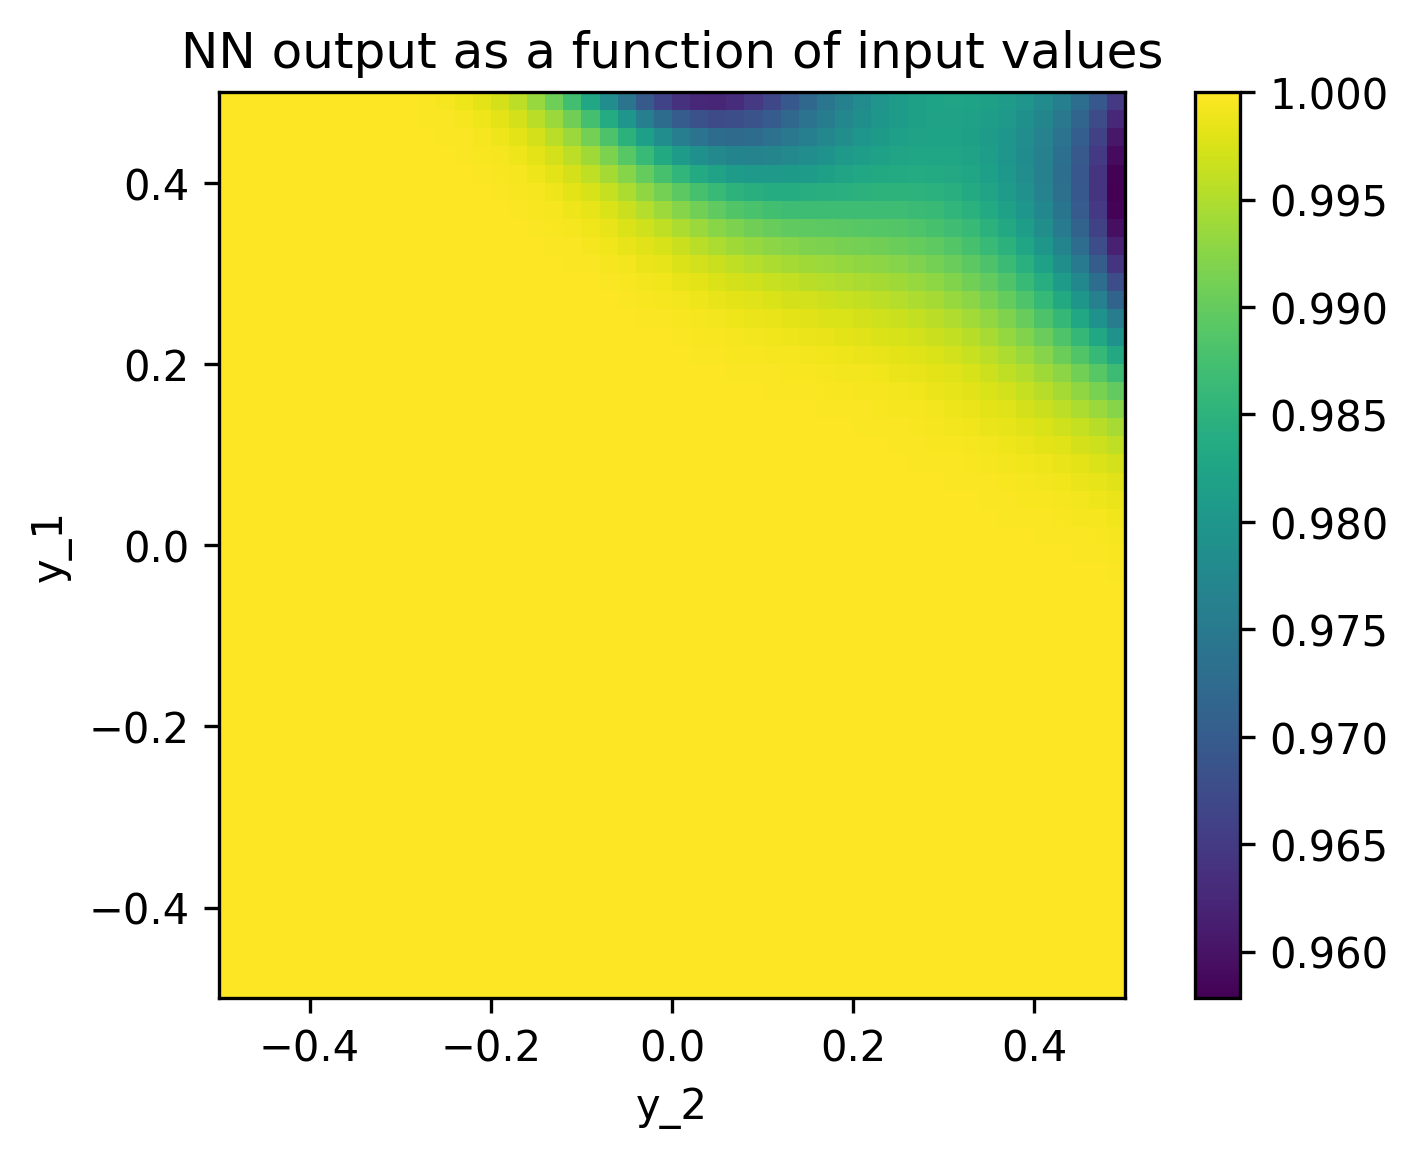

In [ ]:
# display image
plt.imshow(y_out,origin='lower',extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output as a function of input values")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

In [ ]:
# See how the dot product works: 
# 'contracts' (sums over) the innermost index
W=zeros([7,8])
y=zeros([8,30]) 
# here '30' would stand for the number of samples
# in our envisaged network applications
shape(dot(W,y))

(7, 30)

In [ ]:
# now try to add the bias vector entries,
# in the most naive way (beware!)
B=zeros(7)
result=dot(W,y)+B # will produce an error!

ValueError: ignored

In [ ]:
# But with a re-ordering of indices, this works!
# So, let's take the dimension of size 30 to be
# the very first one:
y=zeros([30,8])
W=zeros([8,7])
shape(dot(y,W))

(30, 7)

In [ ]:
# and now try again adding the bias vector,
# again in a naive way
B=zeros(7)
result=dot(y,W)+B 
# will give the desired result, 
# because B is 'broadcast' to shape (30,7)
shape(result)

(30, 7)

In [ ]:
def apply_layer_new(y_in,w,b): # a function that applies a layer    
    z=dot(y_in,w)+b # note different order in matrix product!
    return(1/(1+exp(-z)))

In [ ]:
def apply_net_new(y_in): # same as before, but with new layer function
    global w1,b1,w2,b2
    
    y1=apply_layer_new(y_in,w1,b1)
    y2=apply_layer_new(y1,w2,b2)
    return(y2)

In [ ]:
N0=2 # input layer size
N1=5 # hidden layer size
N2=1 # output layer size

# from input layer to hidden layer:
w1=random.uniform(low=-10,high=+10,size=(N0,N1)) # NEW ORDER!! N0xN1
b1=random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

# from hidden layer to output layer:
w2=random.uniform(low=-10,high=+10,size=(N1,N2)) # NEW ORDER N1xN2
b2=random.uniform(low=-1,high=+1,size=N2) # biases

In [ ]:
batchsize=10000
y=random.uniform(low=-1,high=1,size=(batchsize,2))

In [ ]:
y_out=apply_net_new(y)

In [ ]:
shape(y_out) 
# these were 10000 samples evaluated in parallel!!!

(10000, 1)

In [ ]:
M=50
# Generate a 'mesh grid', i.e. x,y values in an image
v0,v1=meshgrid(linspace(-0.5,0.5,M),linspace(-0.5,0.5,M))

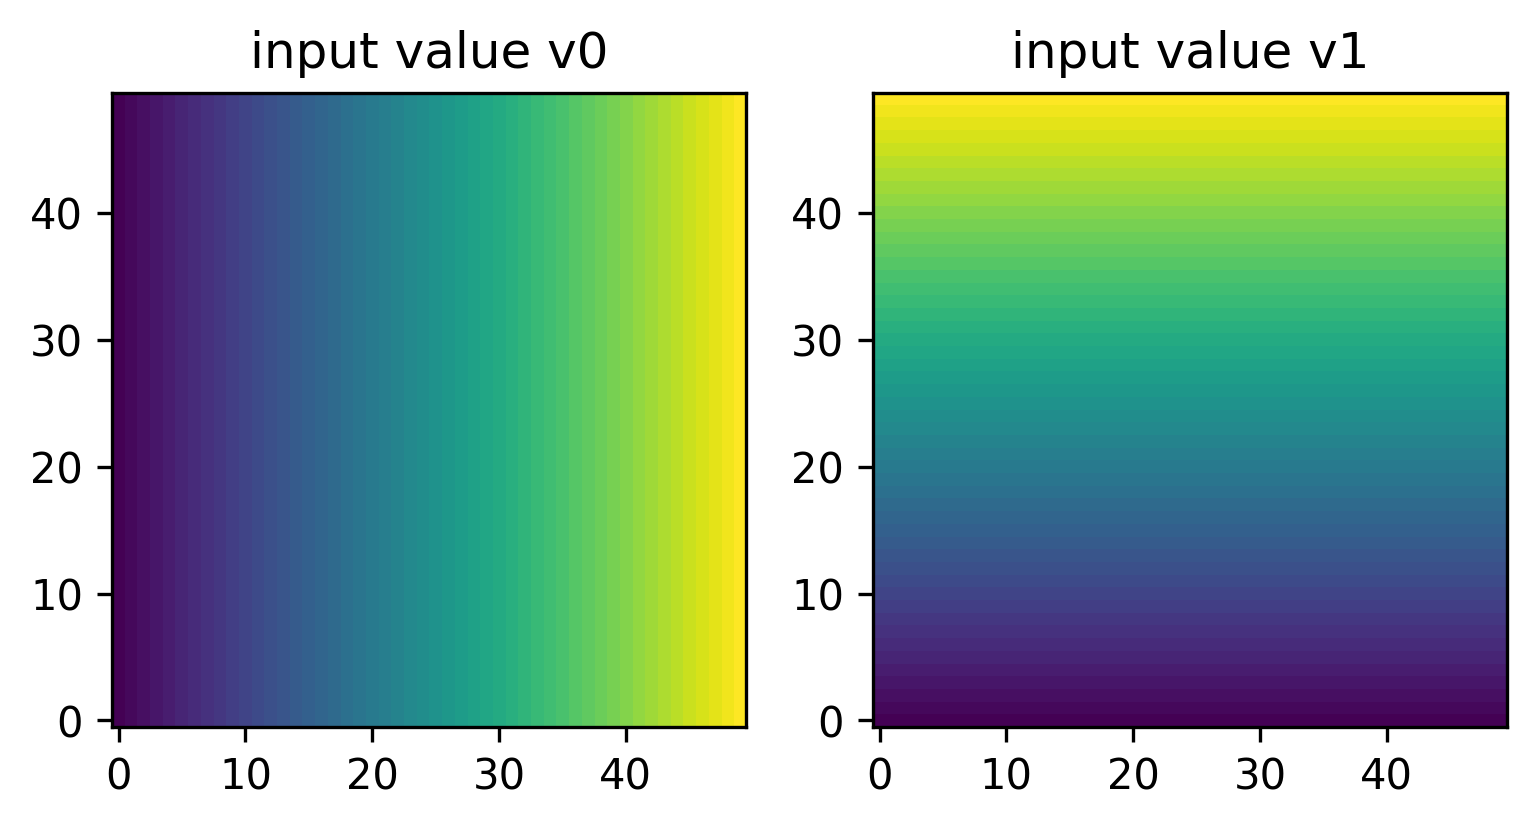

In [ ]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(v0,origin='lower')
ax[0].set_title("input value v0")
ax[1].imshow(v1,origin='lower')
ax[1].set_title("input value v1")
plt.show()

In [ ]:
v0flat=v0.flatten() # make 1D array out of 2D array
v1flat=v1.flatten() 
# that means: MxM matrix becomes M^2 vector
shape(v0flat)

(2500,)

In [ ]:
batchsize=shape(v0flat)[0] # number of samples = number of pixels
y_in=zeros([batchsize,2])
y_in[:,0]=v0flat # fill first component (index 0)
y_in[:,1]=v1flat # fill second component

In [ ]:
# apply net to all these samples simultaneously!
y_out=apply_net_new(y_in)

In [ ]:
shape(y_out) # this is not a vector but a funny matrix batchsize x 1

(2500, 1)

In [ ]:
# turn this back into a 2D matrix (image)
y_2D=reshape(y_out[:,0],[M,M])

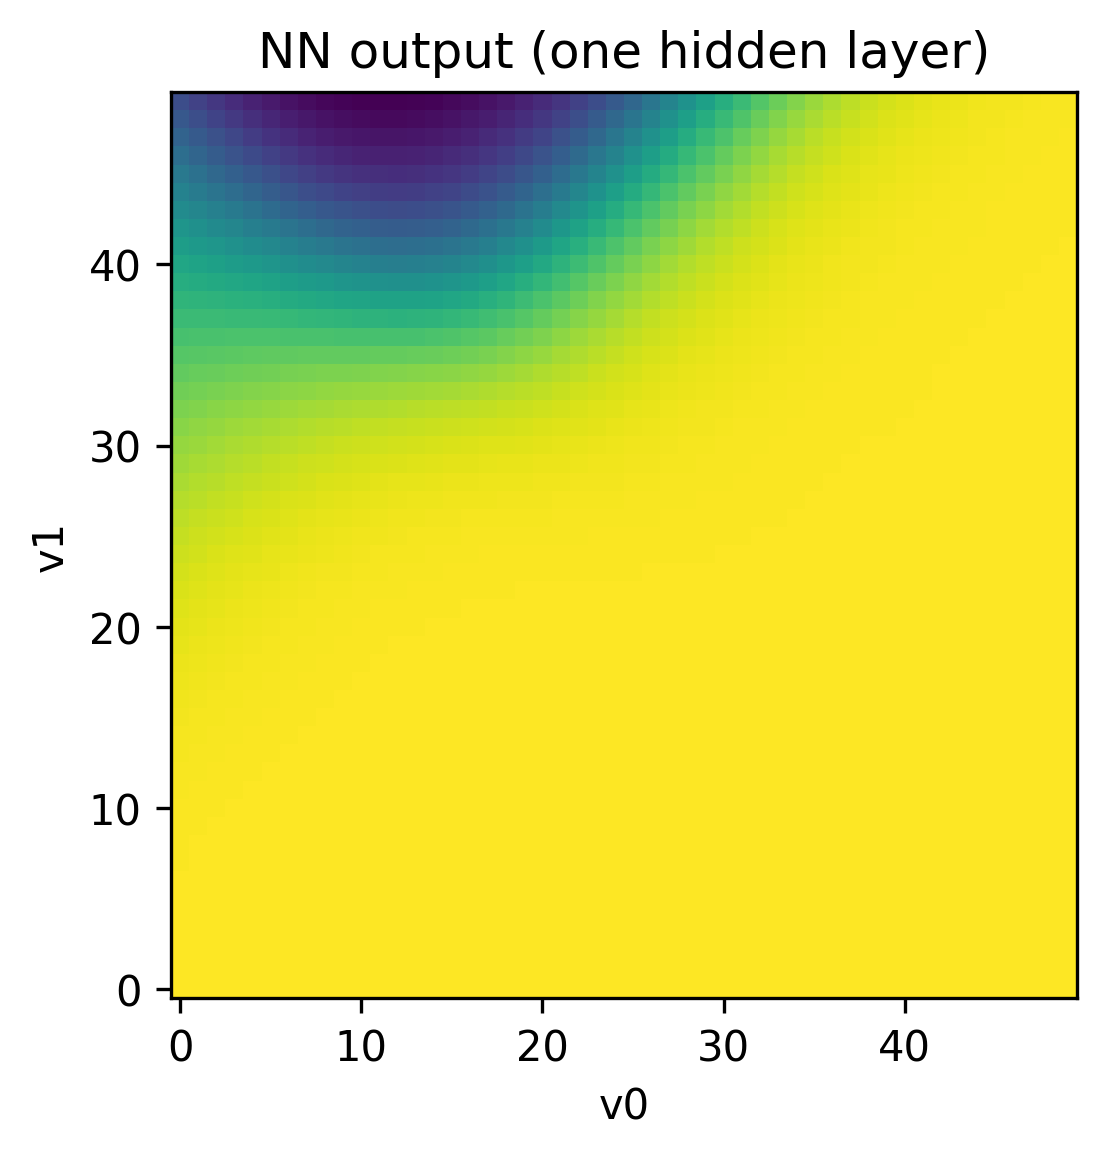

In [ ]:
plt.imshow(y_2D,origin='lower')
plt.title("NN output (one hidden layer)")
plt.xlabel("v0")
plt.ylabel("v1")
plt.show()